# Homework 2: Introduction to Probability and Simulation 
***

**Name**: Jacob Munoz (Collaborated with Kelsey Adams and Andrew Fay)

**Section**: 001
***

This assignment is due on Moodle by **5pm on Friday September 29th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Some problems with code may be autograded.  If we provide a function API please do not change it.  If we do not provide a function API then you're free to structure your code however you like. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import random
%matplotlib inline

### [20 points] Problem 1 
***

In a box there are 99 fair coins and 1 double-headed coin.  You grab one coin at random.  

Work the following problems by hand (but don't be afraid to simulate to check your result!). 


**Part A**: You toss your coin one time.  What is the probability that you toss a Heads? 

1/100 -> chance to grab double-sided coin  
1/1 -> chance for heads on double sided coin  
99/100 -> chance to grab fair coin  
1/2 -> chance for heads on fair coin  

There are now 2 scenarios which are possible:  
A: You grab a fair coin AND toss a heads (1/2 $\cdot$ 99/100 = 99/200)  
B: You grab the double-sided coin and toss a heads (1/1 $\cdot$ 1/100 = 1/100)  

Now either A or B can happen, not both therefore: 99/200 + 1/100 = 101/200  
So the probability that you toss a heads is 101/200  

**Part B**: Suppose you toss a Heads.  What is the probability that the coin you chose from the box is double-sided? 

There is a 101/200 chance of getting a heads and a 1/100 chance of it being a double-sided coin so $\frac{P(H|D)P(D)}{P(H)}$:  
$\frac{1/100}{101/200} = \frac{200}{10100} = \frac{2}{101}$ chance of grabbing double-sided coin

**Part C**: Suppose you flip your coin $n$ times and record each outcome.  Obviously, if you flip Tails you know you picked a fair coin. But, if you flipped $n$ Heads in a row you would have a stronger belief that you in fact grabbed the double-headed coin.  What is the smallest value of $n$ Heads in a row that would make you believe that there's a better-than-half chance that the coin you grabbed is double-headed?  

The probability of a biased coin given n heads in a row is: $\frac{P(N|B)P(B)}{P(N)}$ and we know that P(N|B) = 1 and P(B) = $\frac{1}{100}$  

Now P(n) = P(N|B)P(B) + P(N|F)P(F), where P(N|B) = 1, P(B) = $\frac{1}{100}$, P(N|F) = $\frac{1}{2^n}$, and P(F) = $\frac{99}{100}$  

Putting these back into our original probability yeilds:  $\frac{(1)(\frac{1}{100})}{(\frac{1}{100}) + (\frac{99}{100(2^n)})}$ which must be greater than .5 which is true for n > 7. So if you flip 7 heads in a row there is a greater than 50% you grabbed the double-sided coin

### [20 points] Problem 2  
***

In soccer tournaments, [penalty shootouts](https://en.wikipedia.org/wiki/Penalty_shoot-out_(association_football) are used to determine the outcome of the game if the score is tied after regulation play.   In a penalty shootout, each team takes turns attempting 5 shots on the goal from the penalty mark that are defended only by the opposing team's goalkeeper, with the team that makes more successful kicks being declared the winner of the match.  If after 5 shots the score is still tied, the game enters _sudden death_ and the teams continue to take 1 shot each until one team scores and the other does not. 

Suppose that two teams ( Team $A$ and Team $B~$) are still tied at the end of the first round of 5 penalty shots and are entering sudden death.  Each team will now take one shot each in an attempt to win.  Suppose that the result of one shot is independent of the other shots, Team $A$ makes their shot with probability $p$, and Team $B$ makes their shot with probability $q$.  Let $W$ be the event that "Team $A$ wins the game", $E$ be the event that "the game ends after the first round of sudden death penalty shots", and $T$ be the event that "the game is still tied after the first round of sudden death penalty shots". 

**Part A**: The shootout continues until Team $A$ or Team $B$ wins.  What is the sample space $\Omega$ for this experiment?  Represent the outcomes of individual shots by $G$ for a goal and $M$ for a miss and assume that Team $A$ shoots before Team $B$.

$\Omega$ = {[(A:G & B:M) | (A:M & B:G)] | [(A:G & B:G) & (A:M & B:M) & ... & (A:G & B: M) | (A:M & B:G) ]}  

There are essentially two cases here, either the game ends after the first round of PK's and either Team A or Team B wins or the game will continue until one team makes it and the other misses, which could go on forever. The pattern will continue until either Team A misses and Team B makes it or Team A makes it and Team B misses.

**Part B**: Determine $P(W \mid E)$ in terms of $p$ and $q$.

P(W | E) = $\frac{p(1 - q)}{p(1 - q) + q(1 - p)}$ = $\frac{p(1 - q)}{-2pq + p + q}$

**Part C**: Explain why events $W$ and $T$ are independent. 

Event T says the game is tied after the first round, while event W simply says that team A wins the game. These are independent because event W doesn't specify when team A wins and event T calls for a specific time. W does not care that the game was tied after the first round and T has no effect on W.

**Part D**: Use the Law of Total Probability to show that $P(W) = p(1-q) + (2pq - p - q +1) ~P(W \mid T)$. 

P(W) can be written as P(W) = P(W | E)P(E) + P(W | T)P(T) 

We know from Part B that P(W | E) = $\frac{p(1 - q)}{-2pq + p + q}$ 

And P(E) = p(1 - q) + q(1 - p) = (-2pq + p + q)

We also know that P(T) = pq + (1 - p)(1 - q) = (2pq - p - q + 1)    

Plugging it all back in gives us:  

P(W) = p(1 - q) + (2pq - p - q + 1)P(W | T)

**Part E**: Use the fact from **Part B** that $P(W \mid T) = P(W)$ to determine $P(W)$ in terms of $p$ and $q$. 

P(W) = p(1-q) + (2pq - p - q + 1)P(W)  

p(1 - q) = P(W) - (2pq - p - q + 1)P(W)  

p(1 - q) = P(W)(1 - (2pq - p - q + 1)

P(W) = $\frac{p(1 - q)}{-2pq + p + q}$

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

Since W is independent of T, what we are looking for is for Team A to make a shot and Team B to miss a shot. And because the previous shots have no effect on the next shot and it doesn't matter that the game was tied after the first round. Therefore B and E are the same.

**Part G**: Explain the significance of the solution technique for $P(W)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(W)$ directly?  Can we always use such techniques?  

I think we went about it this way to highlight the independence of W and T, making the problem easier to understand and calculate. Once you see that W and T are independent that problem becomes somewhat trivial with the Law of Total Probability. I think that we can only use this techinique IF there are two probabilities that are completely independent.

### [25 points] Problem 3 
***

After Intro. Data Science lets out for the day, there are a bunch of different locations that Dan and Chris individually end up at.  Sometimes they go get dinner at the UMC ($~U~$) or coffee at Starbucks ($~S~$). Sometimes they go straight to their vehicles in the parking lot ($~P~$) and head home.  And sometimes they go back to their respective offices in the Engineering Center ($~E~$) or Fleming ($~F~$) to work. You can see the locations and paths that they take from Muenzinger ($~M~$) and between other locations on the linked [map](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/hmwk/hmwk02/campus_map.pdf).

Now, on a Wednesday after a particularly grueling start to the week, Dan and Chris leave class at Muenzinger in a bit of a daze and just sorta wander randomly between their usual haunts.  Their movement is governed by the following rule: when leaving a particular location, they randomly select one of the available paths to travel along (again, see the [map](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/hmwk/hmwk02/campus_map.pdf)) with equal probability. 

**Part A**: Compute (by hand) the probability that Chris ends up at the Engineering Center after first visiting one other location after leaving Muenzinger. 

The first route is UMC to EC which is $\frac{1}{4}$ chance to go to UMC then from UMC to EC is $\frac{1}{4}$ so going to UMC AND EC is $\frac{1}{4}$ * $\frac{1}{4}$ = $\frac{1}{16}$  

The other option is going to parking lot then EC which is $\frac{1}{4}$ to parking lot and $\frac{1}{2}$ to EC so going to the parking lot then EC is $\frac{1}{4}$ * $\frac{1}{2}$ = $\frac{1}{8}$  

Giving the total probability of going somewhere else before the EC as $\frac{1}{16}$ + $\frac{1}{8}$ = $\frac{3}{16}$

**Part B**: Compute (by hand) the probability that Dan ends up at the UMC _either_ as his first _or_ second location visited after leaving Muenzinger. 

The probability that Dan ends up at the UMC first is $\frac{1}{4}$  

Now Dan can either go to Starbucks then the UMC or he can go to the EC then UMC  

The probability that Dan goes to Starbucks then the UMC is $\frac{1}{4}$ * $\frac{1}{2}$ = $\frac{1}{8}$  

The probability that Dan goes to the EC then the UMC is $\frac{1}{4}$ * $\frac{1}{4}$ = $\frac{1}{16}$  

The total probability that Dan ends up at the UMC on his first or second location is: $\frac{1}{4}$ + $\frac{1}{8}$ + $\frac{1}{16}$ = $\frac{7}{16}$

**Part C**: Suppose that Chris goes back to his office in the Engineering Center and Dan goes back to his office in Fleming.  Later that night they both leave their offices and wander around. You should assume that they take the same amount of time to go from location to location.  What is the probability that they run into each other in the same location on their second location visited? 

I calculated the probability that both Dan and Chris end up at each location by getting the probability that Dan ends up at a location, the probability that Chris ends up there as well and multiplying them together:  
F = $\frac{1}{64}$  

P = $\frac{1}{128}$  

M = $\frac{3}{64}$  

U = $\frac{3}{128}$  

E = $\frac{1}{32}$  

S = $\frac{1}{64}$  

And summing these together gives a probability of Dan and Chris ending up at the same location as: $\frac{9}{64}$

**Part D**: Write a simulation to confirm that your by-hand calculations in **Part A**, **Part B**, and **Part C** are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should thoroughly explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Part A**, **Part B**, and **Part C**.  

In [4]:
locations = ('M', 'S', 'U', 'P', 'E', 'F')
M = ('S', 'U', 'P', 'E')
S = ('M', 'U')
U = ('S', 'M', 'F', 'E')
P = ('M', 'E')
E = ('M', 'U', 'P', 'F')
F = ('E', 'U')

EC = 0
UMC = 0
sameLoc = 0
for i in range(5000):
    location1 = np.random.choice(M)
    chris1 = np.random.choice(E)
    dan1 = np.random.choice(F)
    if (location1 == 'S'):
        location2 = np.random.choice(S)
    elif (location1 == 'U'):
        location2 = np.random.choice(U)
        UMC = UMC + 1
    elif (location1 == 'P'):
        location2 = np.random.choice(P)
    elif (location1 == 'E'):
        location2 = np.random.choice(E)
    
    if (location2 == 'E'):
        EC = EC + 1
    elif (location2 == 'U'):
        UMC = UMC + 1

    if (chris1 == 'M'):
        chris2 = np.random.choice(M)
    elif (chris1 == 'U'):
        chris2 = np.random.choice(U)
    elif (chris1 == 'P'):
        chris2 = np.random.choice(P)
    elif (chris1 == 'F'):
        chris2 = np.random.choice(F)
    
    if (dan1 == 'E'):
        dan2 = np.random.choice(E)
    elif (dan1 == 'U'):
        dan2 = np.random.choice(U)
    
    if (chris2 == dan2):
        sameLoc = sameLoc + 1
        
print ("Simulation for part A: ", (EC / 5000) * 100, "%")
print ("Simulation for part B: ", (UMC / 5000) * 100, "%")
print ("Simulation for part C: ", (sameLoc / 5000) * 100, "%")

Simulation for part A:  19.38 %
Simulation for part B:  43.22 %
Simulation for part C:  15.22 %


### [20 points] Problem 4 
***

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of [Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)).  The game consists of a round board with 40 "squares" numbered from $0$ to $40$, where squares $0$ and $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 2, 7, 17, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect \$50, \$100, or \$200, or pay the bank \$100 or \$150.  

<p> </p>

- Squares 0, 10, and 20 do not trigger any action 

<p> </p>

- Square 30 is **Go To Jail**, which sends the player directly to **Jail** and ends the turn 

<p> </p>

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values) the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles she pays the bank \$10 and remains in **Jail** 
    
<p> </p>

- If the player passes or lands on **GO** she collects \$200. 

<p> </p>

- If the player lands on any other square not mentioned above, she pays the bank an amount equal to the square's number (e.g. if she lands on Square 29 she pays the bank \$29). 

<p> </p>

If at any point the player has \$0 or less they go bankrupt and the game ends. 

<br>

**Part A**: Complete the function miniopoly_turn below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.  

In [5]:
def miniopoly_turn(state, cash):
    
    #Randomly rolls two "dice" and "card"
    dice1 = random.randint(1,6)
    dice2 = random.randint(1,6)
    dice_sum = dice1 + dice2
    card = random.randint(1,5)
        
    #If the player starts the turn in jail do this first in order to decide whether they move or not
    if (state == 30):
        
        #Player only moves if the di are equal
        if (dice1 == dice2):
            state = 10 + dice_sum
        #Otherwise deduct 10 cash and end the turn, keeping them on 30
        else:
            cash = cash - 10
            if (cash < 0):
                cash = 0
            return state, cash
    #The case in which the player is not in jail, move them the di sum 
    else:
        state = state + dice_sum
    
    #Prevents the state to pass 40 and awards 200 cash for passing Go
    if (state > 40):
        cash = cash + 200
        state = state - 41

    #Checks if the player landed on a card square, uses the random number to decide how to change cash
    if (state == 2 or state == 7 or state == 17 or state == 22 or state == 33 or state == 36):
        if (card == 1):
            cash = cash + 50
        elif (card == 2):
            cash = cash + 100
        elif (card == 3):
            cash = cash + 200
        elif (card == 4):
            cash = cash - 100
        elif (card == 5):
            cash = cash - 150
    #If the player lands on any other square besides the ones listed, deduct cash. Added 30 to prevent
    #double deduction since they will be in jail next turn 
    elif (state != 0 or state != 10 or state != 20 or state != 30):
        cash = (cash - state)
    
    #Prevents cash becoming negative, if a player goes bankrupt during turn they will no longer be in the
    #game next turn
    if (cash < 0):
        cash = 0

    return state, cash 

**Part B**: Use your function from **Part A** to Simulate at least 5000 30-turn games of Miniopoly and make a frequency histogram of the player's cash at the end of the game. 

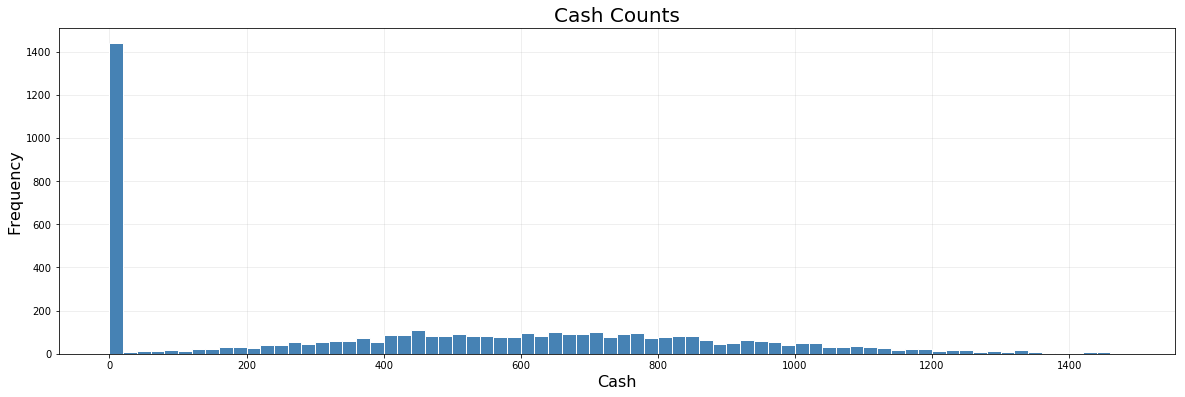

In [6]:
#A df to keep data from games
game_data = pd.DataFrame([])

#Runs 5000 games, starting each one with 200 cash and state 0. Jail and go keep track of if they went to jail or not
# and how many times Go was passed.
for _ in range(5000):
    cash = 200
    state = 0
    jail = 0
    go = 0
    
    #Each game lasts for 30 turns, calling the turn function each time
    for _ in range(30):
        previous_state = state
        (state, cash) = miniopoly_turn(state, cash)
        #Checks if the player goes bankrupt, end the game early as there is no need to continue loop, append data
        if (cash == 0):
            game_data = game_data.append(pd.DataFrame({'Cash' : cash, 'Jail' : jail, 'Go' : go}, index = [0]), ignore_index = True)
            break
        if ((previous_state >= 29) & (state <= 11)):
            go = (go + 1)
        if (state == 30):
            jail = 1
        if (_ == 29):
            game_data = game_data.append(pd.DataFrame({'Cash' : cash, 'Jail' : jail, 'Go' : go}, index = [0]), ignore_index = True)
            
#Fills and NaN will 0 
game_data['Go'].fillna("0", inplace = True)
game_data['Jail'].fillna("0", inplace = True)

#Sets up the graph for plotting
fig, ax = plt.subplots(figsize=(20,6))

my_bins = range(0, 1500, 20)
game_data['Cash'].hist(ax = ax, bins = my_bins, facecolor = "steelblue", edgecolor = "white")

#Adds Titles for readability
ax.set_title("Cash Counts", fontsize = 20)
ax.set_xlabel("Cash", fontsize = 16)
ax.set_ylabel("Frequency", fontsize = 16)

#Improves viewing
ax.grid(alpha = 0.25)
ax.set_axisbelow(True)

The graph shows that in the first 30 turns most people ended up going bankrupt however there is a slight binomial curve around 600-800 dollars.

**Part C**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns of the game. 

In [7]:
#Adds a frequency for the cash inside the df then counts all instances of 0 
game_data['freq'] = game_data.groupby('Cash')['Cash'].transform('count')
count0 = game_data.loc[game_data['Cash'] == 0, 'freq'].iloc[0]

#Calculates probability of going bankrupt before 30 turns with 5000 games
print ("Probability of going bankrupt in the first 30 turns is: ", (count0 / 5000 * 100), "%")

Probability of going bankrupt in the first 30 turns is:  28.54 %


It seems that you have a decent chance of going bankrupt with 27-29%

**Part D**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns _given_ that they went to **Jail** at least once.  Is a player more or less likely to go bankrupt if they've been to **Jail**?  

In [8]:
game_data['freq'] = game_data.groupby('Cash')['Cash'].transform('count')

#If the player goes bankrupt and went to jail
jail_count = game_data.loc[(game_data['Cash'] == 0) & (game_data['Jail'] == 1), 'freq'].count()

print("The chance of going bankrupt in the first 30 turns if you went to jail is: ", '{:f}'.format((jail_count/count0) * 100), "%")

The chance of going bankrupt in the first 30 turns if you went to jail is:  40.224247 %


This shows that you have a much higher chance of going to jail if you went to jail, about a 10% higher chance than  if you don't end up in jail

**Part E**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns _given_ that they passed **Go** two or more times.  Is a player more or less likely to go bankrupt if they've managed to pass **Go** at least twice?

In [9]:
game_data['freq'] = game_data.groupby('Cash')['Cash'].transform('count')

#If the player goes bankrupt and passed Go at least twice
go_count = game_data.loc[(game_data['Cash'] == 0) & (game_data['Go'] >= 2), 'freq'].count()

print("The chance of going bankrupt in the first 30 turns given you passed Go twice is: ", '{:f}'.format((go_count/count0) * 100), "%")

The chance of going bankrupt in the first 30 turns given you passed Go twice is:  7.217940 %


If you passed Go at least twice you have a much lower chance to go bankrupt, about 20% less likely.

### [15 points] Problem 5 
***

### Board Game Calamity! 

Dan and Chris have been playing board games for ages. Among the games they play a lot are Miniopoly and a similar game with slightly tweaked rules called **Fakeiopoly!**  Being Data-Nerds, they like to record the details of each game they play for future analysis.  Since the games are similar, they store the results for Miniopoly and Fakeiopoly in the same database.  Unfortunately, their data has been corrupted!  The only data that survived are the states (i.e. square numbers) they were on after each of the first 20 turns as well a the amount of cash they had on hand after each of the first 20 turns. This information is stored in the columns **S1**-**S20** and **C1**-**C20** in the following DataFrame. 

In [10]:
dfLog = pd.read_csv("https://raw.githubusercontent.com/chrisketelsen/csci3022/master/hmwk/hmwk02/game_log.csv")
dfLog.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,C12,C13,C14,C15,C16,C17,C18,C19,C20,Game
0,10,23,33,1,13,22,31,0,6,15,...,437,427,409,380,343,593,582,561,530,fake
1,4,8,15,21,29,38,3,9,18,25,...,595,584,684,657,622,819,805,705,673,fake
2,9,17,23,31,39,39,39,39,39,39,...,0,0,0,0,0,0,0,0,0,real
3,7,10,16,22,31,0,6,13,16,23,...,285,275,265,265,239,202,398,385,362,real
4,11,23,33,39,39,39,39,39,39,39,...,0,0,0,0,0,0,0,0,0,fake


You might notice that there is one extra column in the DataFrame called **Game** which describes whether they were playing Miniopoly (labeled real) or Fakeiopoly (labeled fake).  Unfortunately, the **Game** labels only survived in the first half of the DataFrame.  As you can see, the **Game** labels in the second half of the database were lost. 

In [11]:
dfLog.tail()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,C12,C13,C14,C15,C16,C17,C18,C19,C20,Game
995,5,13,20,22,32,38,7,15,28,0,...,443,420,393,358,558,408,392,364,326,NaN
996,8,14,18,24,32,39,6,10,14,21,...,158,119,310,292,269,240,290,484,470,NaN
997,7,14,19,23,33,1,8,15,26,38,...,497,484,465,436,486,686,586,571,545,NaN
998,5,13,22,29,38,7,16,27,37,8,...,547,520,620,817,801,778,978,1177,1164,NaN
999,8,13,23,30,30,30,22,28,34,38,...,536,513,482,682,674,660,639,613,579,NaN


While they can deal with the loss of information about later turns, doing any kind of meaningful analysis on the data requires knowledge of which game they were playing.  Your job is to see if you can reconstruct the missing **Game** labels in the second half of the DataFrame.  

Sadly, Fakeiopoly was a game of their own invention, and the rules were among the lost data.  But, being budding data scientists, you can probably glean some insights into the non-standard rules by exploring the data with intact labels in the first half of the DataFrame. 

**Part A**: Complete the function predict_game_log below to predict whether each game in the DataFrame is real or fake.  To help you, we've provided a score function that reports the accuracy of your predictions on the rows that have intact labels.  

OK, here are the **rules**: 

- You may **NOT** load any external libraries beyond Pandas, Numpy, and Matplotlib.  Instead of fancy Machine Learning techniques you may have picked up on the streets, you'll have to rely on your probability, heuristics, and exploratory data analysis skills. 
- You may write any additional functions you like, but you should **NOT** change the way that predict_game_log is called or what it returns. 

And some final **guidance**: 

- While we hope you do well, and obtain great accuracies, we're more interested in seeing how you approach the problem.  As part of your solution you should describe in detail how you based your predictions.  A solution with high accuracy and no justification of you approach may receive a low score, while a solution with mediocre accuracy and good justification may receive a high score.  What aspects of the data lead you to believe that your approach might be successful? Supporting evidence might include graphical summaries of the data and extensive description of trial and error. 

In [27]:
def predict_game_log():
    count = 0
    prediction = "real"
    dfPrediction = pd.read_csv("https://raw.githubusercontent.com/chrisketelsen/csci3022/master/hmwk/hmwk02/game_log.csv")
    dfPrediction.loc[:, "Prediction"] = "real"
    for i in range(999):
        some = True
        for _ in range(20):
            if(_ > 18):
                break
                
            stateColumn = 'S' + str(_+1)
            cashColumn = 'C' + str(_+1)
            cashColumn2 = 'C' + str(_+2)
            stateColumn2 = 'S' + str(_+2)  
            nextCashValue = dfPrediction.at[i, str(cashColumn2)]
            cashValue = dfPrediction.at[i, str(cashColumn)]
            stateValue = dfPrediction.at[i, str(stateColumn)]
            nextStateValue = dfPrediction.at[i, str(stateColumn2)]
            stateDiff = abs(nextStateValue - stateValue)
            cashDiff = int(abs(nextCashValue - cashValue))
            
            #Checks to see if the player moved more than 12 spaces
            if(not(stateValue > 28)):
                if(stateDiff > 12):
                    dfPrediction.set_value(i, 'Prediction', "fake")
            
            #If the player gets more than 200 for passing Go
            if ((nextStateValue < 11) and (stateValue > 28)):
                if((cashDiff >= 200) and ((nextStateValue != 2) or (nextStateValue != 7))):
                    dfPrediction.set_value(i, 'Prediction', "fake")
                    
            #Checks to see if jail dedection is different, accounts for when the player exits jail as well
            if(stateValue == 30):
                if((cashDiff != 10) and cashDiff not in range (12, 22) and (cashDiff != 50) and (cashDiff != 100) and (cashDiff != 150) and (cashDiff != 200)):
                    dfPrediction.set_value(i, 'Prediction', "fake")
        
            #This is the highest possible gain in miniopoly, it seems it is possible to get more in fakeopoly (maybe?)
            if((cashDiff > 400)):
                dfPrediction.set_value(i, 'Prediction', "fake")
                
    return dfPrediction
predict_game_log()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,C13,C14,C15,C16,C17,C18,C19,C20,Game,Prediction
0,10,23,33,1,13,22,31,0,6,15,...,427,409,380,343,593,582,561,530,fake,fake
1,4,8,15,21,29,38,3,9,18,25,...,584,684,657,622,819,805,705,673,fake,fake
2,9,17,23,31,39,39,39,39,39,39,...,0,0,0,0,0,0,0,0,real,real
3,7,10,16,22,31,0,6,13,16,23,...,275,265,265,239,202,398,385,362,real,fake
4,11,23,33,39,39,39,39,39,39,39,...,0,0,0,0,0,0,0,0,fake,real
5,8,18,25,27,36,8,15,20,26,36,...,371,340,303,553,544,529,379,348,real,fake
6,3,11,22,26,31,39,7,10,20,31,...,635,612,580,630,624,624,608,589,fake,fake
7,8,18,28,36,36,36,36,36,36,36,...,0,0,0,0,0,0,0,0,fake,real
8,5,12,19,26,38,9,13,19,29,32,...,344,319,284,247,447,447,428,399,real,fake
9,10,21,27,38,6,15,20,32,1,4,...,420,410,400,390,380,370,360,360,fake,fake


In [28]:
def score(df):
    '''
    Function to score your predictions on the labeled game data. 
    '''
    num_samples = len(df.loc[pd.notnull(df["Game"])])
    num_correct = np.sum(df.loc[pd.notnull(df["Game"]), "Game"] == df.loc[pd.notnull(df["Game"]), "Prediction"])
    print("accuracy on labeled data: {}".format(num_correct / num_samples))
score(predict_game_log())

accuracy on labeled data: 0.606


I went about this by checking as many cases I could think of where the game could be different, most of them had no effect on my accuracy or lowered it. I did however find some cases that did improve the accuracy.  

Things that did not work:  

. Tried testing for different deductions on normal square tiles, had no effect on accurracy so the tile deduction is the same  

. Checked if the played landed on a card square and got a different value than 50, 100, 150, or 200 (abs)  

. Checking if the tiles 0, 10, and 20 had any effect, they did not  

. Checked if the player did not move from one turn to the next and was not bankrupt or in jail (If there is a rule that skips a player or a way to get un-bankrupt)  

. I noticed sometimes the player would get "stuck" on 36/39 more often so I checked for a special tile case.  

. I have a check for jail deduction other than 10, according to the table you lose 10 in jail however the test catches a fiew cases. I haven't quite figured out why this is yet however  

. Checked if the special tiles (2, 7, 17, 22, 33, and 36) always subtracted or always gave money

Things that worked:  

. Checked if the player moved more than 12 squares  

. Checked if the player got more than 200 after passing Go and did not land on special card square  

. Checked if the player got "strange" money values such as something NOT between 0-40, 50, 100, 150, 200, or 200-(tile value after passing Go i.e. 200-3)

**[Extra Credit] Part B**: Based on your exploratory data analysis, can you predict how the rules of Fakeiopoly differ from Miniopoly?  Be sure to thoroughly justify your conclusions. 

### Challenge Problem - Night Falls. A Storm Rolls In. Can You Cross The River?
***

In every homework assignment we'll give you a Challenge Problem.  Challenge Problems never need to be turned in (and in fact, will not be graded) but we encourage you to give them a shot (after completing the required homework problems) and discuss them with your classmates and your instructors. 

The following Challenge Problem was a [Riddler](https://fivethirtyeight.com/tag/the-riddler/) on [FiveThirtyEight](https://fivethirtyeight.com) a few years back. 

You’re on the north shore of a river, and want to cross to the south, via a series of 13 bridges and six islands, which you can see in the diagram below. But, as you approach the water, night falls, a bad storm rolls in, and you’re forced to wait until morning to try to cross. Overnight, the storm could render some of the bridges unusable — it has a 50 percent chance of knocking out each of the bridges. (The chance is independent for each bridge.)

<br>

![alt text](https://espnfivethirtyeight.files.wordpress.com/2016/01/roeder-riddler-diagram-11.png?w=575&h=449&quality=90&strip=info)

<br>

What’s the probability you will be able to cross the river in the morning? (You have no boat, can’t swim, can’t fix the bridges, etc. No tricks.)